Considere o problema do teste de dureza uma esfera de aço, que é pressionada contra a superfície de um bloco de material a uma carga padrão. (Aula 3, slide 31).

Construa gráficos para o poder do teste, variando 

$\alpha$: Nível de Significância

$n$: Tamanho da Amostra

$H_1$: Hipótese Alternativa

Um por vez, fixados os demais.

Você deve apresentar um .pdf com códigos e resultados, utilizando a linguagem de programação de sua preferência.

In [111]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import t

In [112]:
sns.set_style('whitegrid')
hfont = {'fontname':'Times New Roman'}

In [172]:
def plot_boxplot_histogram(data_frame, column):

    # creating a figure composed of two matplotlib.Axes objects (ax_box and ax_hist)
    f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})

    labels = ax_hist.get_xticklabels() + ax_hist.get_yticklabels()
    [label.set_fontname("Times New Roman") for label in labels]

    # assigning a graph to each ax
    sns.boxplot(data_frame[column], orient="h", ax=ax_box)
    
    sns.histplot(data=data_frame, x=column, ax=ax_hist)
    ax_hist.set_xlabel(f'Diametro - {column}', **hfont) 
    ax_hist.set_ylabel(f'Contagem', **hfont) 
    
    ax_box.set_title(f"Histograma e Boxplot para dados de {column}", **hfont)
    
    # Remove x axis name for the boxplot
    ax_box.set(xlabel='')
    plt.show()
    return f

### Load Data

In [114]:
import os
os.getcwd()

'/Users/user/Documents/Pessoal/sme0816_planejamento_experimentos/codigos'

In [115]:
df = pd.read_csv('/Users/user/Documents/Pessoal/sme0816_planejamento_experimentos/data/data_teste_dureza.csv')

In [116]:
df

,bloco,esfera_a,esfera_b,diferenca
0,1,7.5,5.2,2.3
1,2,4.6,4.1,0.5
2,3,5.7,4.3,1.4
3,4,4.3,4.7,-0.4
4,5,5.8,3.2,2.6
5,6,3.2,4.9,-1.7
6,7,6.1,5.2,0.9
7,8,5.6,4.4,1.2
8,9,3.4,5.7,-2.3
9,10,6.5,6.0,0.5


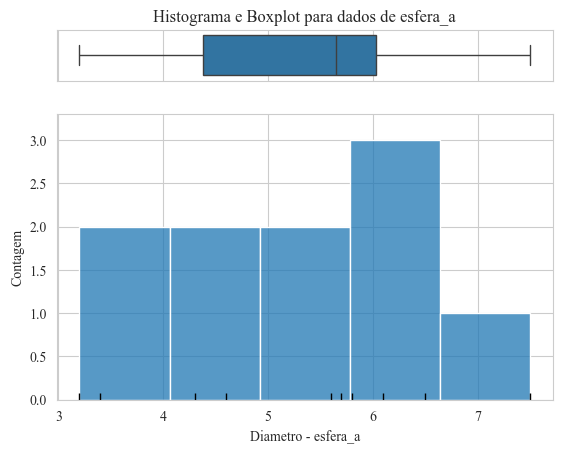

In [173]:
grafico = plot_boxplot_histogram(df, 'esfera_a')
grafico.savefig("histograma_esfera_a.png", dpi=300)

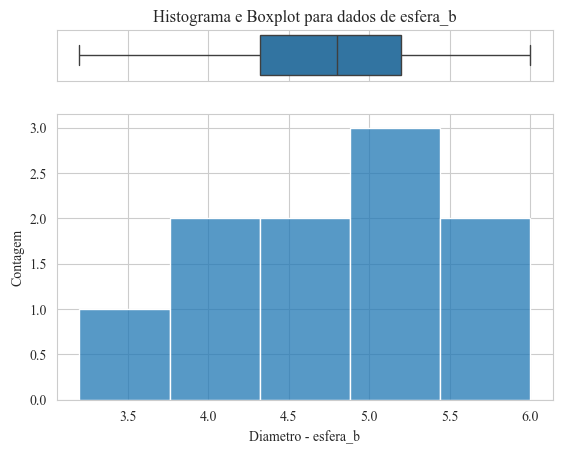

In [168]:
grafico = plot_boxplot_histogram(df, 'esfera_b')
grafico.savefig("histograma_esfera_b.png", dpi=300)

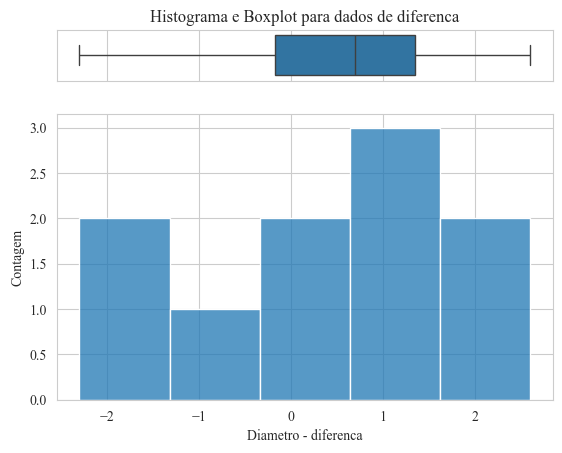

In [169]:
grafico = plot_boxplot_histogram(df, 'diferenca')
grafico.savefig("histograma_diferenca.png", dpi=300)

### Teste de Normalidade dos dados

Utiliza-se o teste de Shapiro Wilk através da função shapiro da biblioteca Scipy.

Essa função tem como hipótese nula de que os dados foram amostrados de uma distribuição normal.

In [120]:
from scipy.stats import shapiro

In [121]:
statistic,pvalue = shapiro(df['diferenca'])
print(f"P-valor do teste de Shapiro Wilk para os dados da diferença: {pvalue:.2f}")

P-valor do teste de Shapiro Wilk para os dados da diferença: 0.58


Como pode ser observado, a diferença dos diâmetros não tem a Hipótese Nula rejeitada.

### Estatística de Teste

$$T = \frac{\sqrt{n}(\bar{D} - \Delta_0)}{sd} \overset {H_0} \sim t_{n-1}$$


### Poder do Teste - $H_1: \Delta_0>0.2$
$\beta = P(\text{Não Rejeitar } H_0 \text{ | } H_0 \text{ é falsa})$

$1 - \beta = P(\text{Rejeita } H_0 \text{ | } H_0 \text{ é falsa})$

In [254]:
def funcao_poder_t_h1_maior(alpha, n, delta, dist_t, dados):
    # Distribuicao
    dist = dist_t(n)
    
    # media
    media = dados.mean()

    # variancia
    desvio_padrao = dados.std()

    # erro padrao
    erro_padrao = desvio_padrao/np.sqrt(n)

    # t superior
    quantil_alpha = dist.ppf(1-alpha)

    # Valor critico de delta sob H0
    delta_sup_h0 = media + quantil_alpha*erro_padrao

    # Valor critico sob H1 - transformado para t-student (divide por erro padrao)
    t_sup_h1 = (delta_sup_h0 - (media + delta))/erro_padrao

    # Erro tipo II
    beta = dist.cdf(t_sup_h1)

    # Poder
    poder = 1 - beta

    return poder



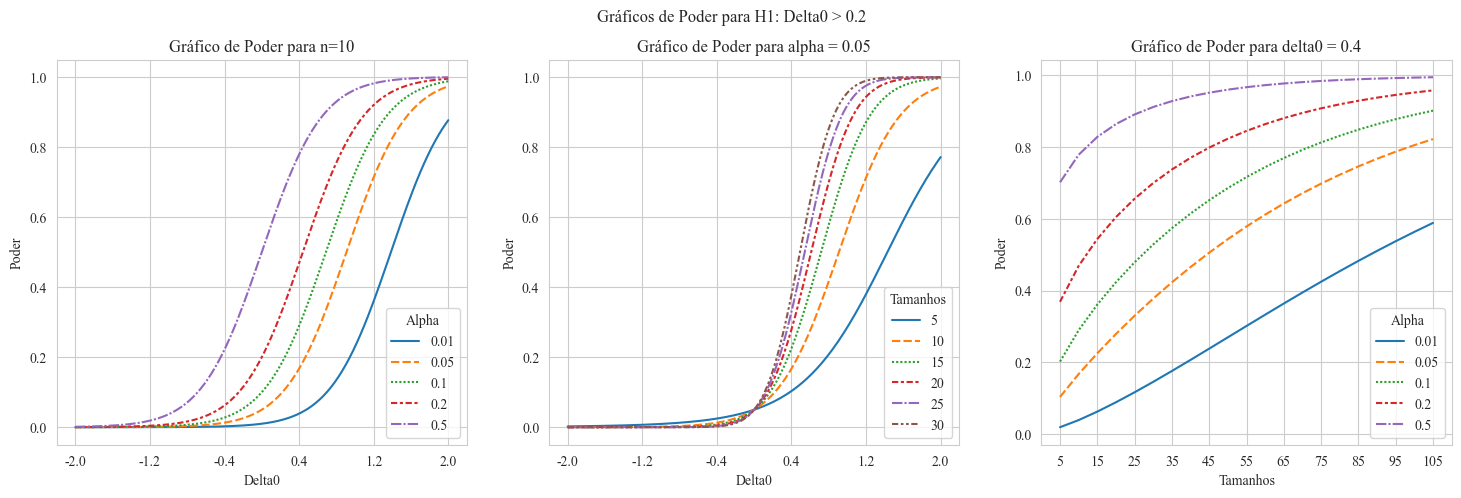

In [270]:

f, ax = plt.subplots(1, 3, figsize=(18, 5))
f.suptitle('Gráficos de Poder para H1: Delta0 > 0.2', **hfont)
n=10
alpha = np.array([0.01, 0.05, 0.1, 0.2, 0.5])#np.logspace(-0.3,-2,10)
alpha = alpha.round(2)
delta = np.arange(-2, 2.02, 0.02)#[0.01, 0.05, 0.1, 0.2, 0.4]
delta = delta.round(2)
dados = df['diferenca']

poder = []
for a in alpha:
    poder.append(funcao_poder_t_h1_maior(alpha=a, n=n, delta=delta, dist_t=t, dados=dados))

hfont = {'fontname':'Times New Roman'}

sns.lineplot(poder, ax=ax[0])
ax[0].set_xticks(np.arange(0,len(delta),40))
ax[0].set_xticklabels(delta[::40], **hfont)
ax[0].set_xlabel('Delta0', **hfont)

ax[0].set_yticks(np.linspace(0,1,6))
ax[0].set_yticklabels(np.linspace(0,1,6).round(2), **hfont)
ax[0].set_ylabel('Poder', **hfont)
ax[0].legend(handles=ax[0].lines, labels=alpha.tolist(), title='Alpha', prop = { "family": "Times New Roman"},
          title_fontproperties={ "family": "Times New Roman"}, loc="lower right")

ax[0].set_title(f"Gráfico de Poder para n={n}", **hfont)

alpha = 0.05
tamanhos = np.arange(5,35,5)
delta = np.arange(-2, 2.02, 0.02)
delta = delta.round(2)
dados = df['diferenca']

poder = []
for n in tamanhos:
    poder.append(funcao_poder_t_h1_maior(alpha=alpha, n=n, delta=delta, dist_t=t, dados=dados))


sns.lineplot(poder, ax=ax[1])

ax[1].set_xticks(np.arange(0,len(delta),40))
ax[1].set_xticklabels(delta[::40], **hfont)
ax[1].set_xlabel('Delta0', **hfont)

ax[1].set_yticks(np.linspace(0,1,6))
ax[1].set_yticklabels(np.linspace(0,1,6).round(2), **hfont)
ax[1].set_ylabel('Poder', **hfont)
ax[1].legend(handles=ax[1].lines, labels=tamanhos.tolist(), title='Tamanhos', prop = { "family": "Times New Roman"},
          title_fontproperties={ "family": "Times New Roman"}, loc="lower right")

ax[1].set_title(f"Gráfico de Poder para alpha = {alpha}", **hfont)


alpha = np.array([0.01, 0.05, 0.1, 0.2, 0.5])
tamanhos = np.arange(5,110,5)
delta = 0.4
dados = df['diferenca']

poder = []
for a in alpha:
    poder.append(funcao_poder_t_h1_maior(alpha=a, n=tamanhos, delta=delta, dist_t=t, dados=dados))

hfont = {'fontname':'Times New Roman'}

#f, ax = plt.subplots(1, 1)
sns.lineplot(poder, ax=ax[2])

ax[2].set_xticks(np.arange(0,len(tamanhos), 2))
ax[2].set_xticklabels(tamanhos[::2], **hfont)
ax[2].set_yticks(np.linspace(0,1,6))
ax[2].set_yticklabels(np.linspace(0,1,6).round(2), **hfont)
ax[2].set_xlabel('Tamanhos', **hfont)
ax[2].set_ylabel('Poder', **hfont)
ax[2].legend(handles=ax[2].lines, labels=alpha.tolist(), title='Alpha', prop = { "family": "Times New Roman"},
          title_fontproperties={ "family": "Times New Roman"}, loc="lower right")

ax[2].set_title(f"Gráfico de Poder para delta0 = {delta}", **hfont)


plt.show()

In [271]:
f.savefig("h1_maior.jpeg", dpi=300)

#### $H_1:\Delta_0<0.2$

In [256]:
def funcao_poder_t_h1_menor(alpha, n, delta, dist_t, dados):
    # Distribuicao
    dist = dist_t(n-1)
    
    # media
    media = dados.mean()

    # variancia
    desvio_padrao = dados.std()

    # erro padrao
    erro_padrao = desvio_padrao/np.sqrt(n)

    # t inferior
    quantil_alpha = dist.ppf(alpha)

    # Valor critico de delta sob H0
    delta_inf_h0 = media + quantil_alpha*erro_padrao
    
    # Valor critico sob H1 - transformado para t-student (divide por erro padrao)
    t_inf_h1 = (delta_inf_h0 - (media + delta))/erro_padrao

    # Erro tipo II
    beta = 1 - dist.cdf(t_inf_h1)

    # Poder
    poder = 1 - beta

    return poder



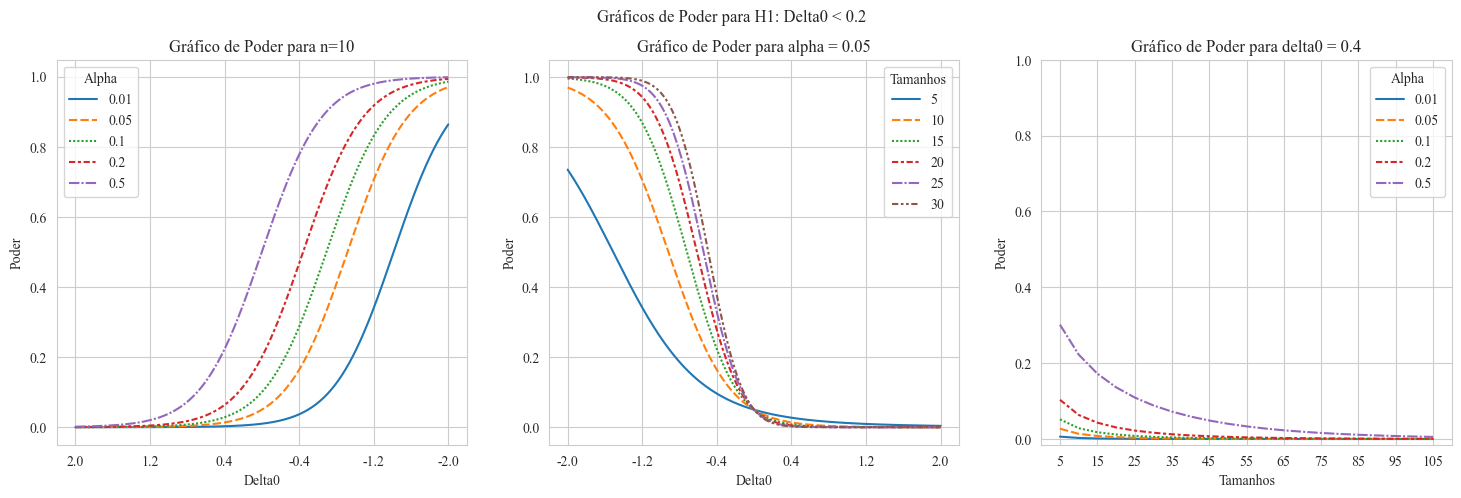

In [272]:
hfont = {'fontname':'Times New Roman'}
f, ax = plt.subplots(1, 3, figsize=(18, 5))
f.suptitle('Gráficos de Poder para H1: Delta0 < 0.2', **hfont)

n = 10
alpha = np.array([0.01, 0.05, 0.1, 0.2, 0.5])#np.logspace(-0.3,-2,10)
alpha = alpha.round(2)
delta = np.arange(-2, 2.02, 0.02)#[0.01, 0.05, 0.1, 0.2, 0.4]
delta = delta.round(2)
dados = df['diferenca']
poder = []
for a in alpha:
    poder.append(funcao_poder_t_h1_menor(alpha=a, n=n, delta=delta[::-1], dist_t=t, dados=dados))

sns.lineplot(poder, ax=ax[0])
ax[0].set_xticks(np.arange(0,len(delta),40))
ax[0].set_xticklabels(delta[::-40], **hfont)
ax[0].set_xlabel('Delta0', **hfont)
ax[0].set_yticks(np.linspace(0,1,6))
ax[0].set_yticklabels(np.linspace(0,1,6).round(2), **hfont)
ax[0].set_ylabel('Poder', **hfont)
ax[0].legend(handles=ax[0].lines, labels=alpha.tolist(), title='Alpha', prop = { "family": "Times New Roman"},
          title_fontproperties={ "family": "Times New Roman"})
ax[0].set_title("Gráfico de Poder para n=10", **hfont)

### GRAFICO 2
alpha = 0.05
tamanhos = np.arange(5,35,5)
delta = np.arange(-2, 2.02, 0.02)#[0.01, 0.05, 0.1, 0.2, 0.4]
delta = delta.round(2)
dados = df['diferenca']
poder = []
for n in tamanhos:
    poder.append(funcao_poder_t_h1_menor(alpha=alpha, n=n, delta=delta, dist_t=t, dados=dados))

sns.lineplot(poder, ax=ax[1])
ax[1].set_xticks(np.arange(0,len(delta),40))
ax[1].set_xticklabels(delta[::40], **hfont)
ax[1].set_xlabel('Delta0', **hfont)

ax[1].set_yticks(np.linspace(0,1,6))
ax[1].set_yticklabels(np.linspace(0,1,6).round(2), **hfont)
ax[1].set_ylabel('Poder', **hfont)
ax[1].legend(handles=ax[1].lines, labels=tamanhos.tolist(), title='Tamanhos', prop = { "family": "Times New Roman"},
          title_fontproperties={ "family": "Times New Roman"}, loc="upper right")

ax[1].set_title("Gráfico de Poder para alpha = 0.05", **hfont)


alpha = np.array([0.01, 0.05, 0.1, 0.2, 0.5])
tamanhos = np.arange(5,110,5)
delta = 0.4
dados = df['diferenca']

poder = []
for a in alpha:
    poder.append(funcao_poder_t_h1_menor(alpha=a, n=tamanhos, delta=delta, dist_t=t, dados=dados))

hfont = {'fontname':'Times New Roman'}

#f, ax = plt.subplots(1, 1)
sns.lineplot(poder, ax=ax[2])

ax[2].set_xticks(np.arange(0,len(tamanhos), 2))
ax[2].set_xticklabels(tamanhos[::2], **hfont)
ax[2].set_yticks(np.linspace(0,1,6))
ax[2].set_yticklabels(np.linspace(0,1,6).round(2), **hfont)
ax[2].set_xlabel('Tamanhos', **hfont)
ax[2].set_ylabel('Poder', **hfont)
ax[2].legend(handles=ax[2].lines, labels=alpha.tolist(), title='Alpha', prop = { "family": "Times New Roman"},
          title_fontproperties={ "family": "Times New Roman"}, loc="upper right")

ax[2].set_title(f"Gráfico de Poder para delta0 = {delta}", **hfont)


plt.show()

In [273]:
f.savefig("h1_menor.jpeg", dpi=300)

### $H_1: \Delta_0 \neq 0.2$

In [274]:
def funcao_poder_t_h1_diferente(alpha, n, delta, dist_t, dados):
    poder_maior = funcao_poder_t_h1_maior(alpha/2, n, delta, dist_t, dados)
    poder_menor = funcao_poder_t_h1_menor(alpha/2, n, delta, dist_t, dados)

    return poder_maior + poder_menor

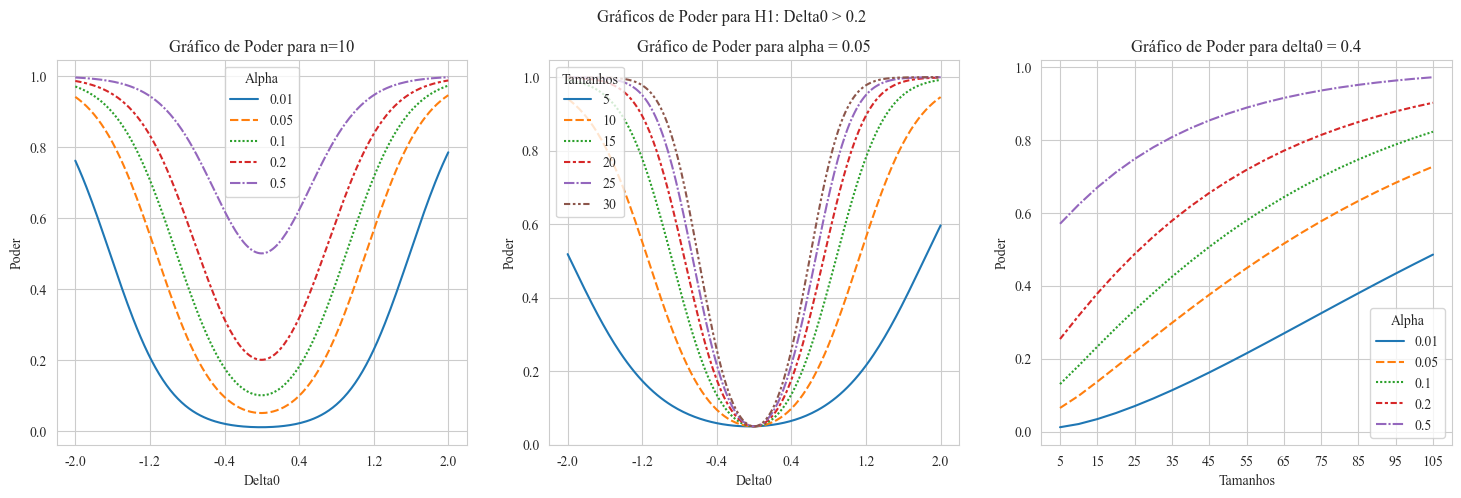

In [275]:
hfont = {'fontname':'Times New Roman'}
f, ax = plt.subplots(1, 3, figsize=(18, 5))
f.suptitle('Gráficos de Poder para H1: Delta0 > 0.2', **hfont)

n = 10
alpha = np.array([0.01, 0.05, 0.1, 0.2, 0.5])#np.logspace(-0.3,-2,10)
alpha = alpha.round(2)
delta = np.arange(-2, 2.02, 0.02)#[0.01, 0.05, 0.1, 0.2, 0.4]
delta = delta.round(2)
dados = df['diferenca']
poder = []
for a in alpha:
    poder.append(funcao_poder_t_h1_diferente(alpha=a, n=n, delta=delta, dist_t=t, dados=dados))

sns.lineplot(poder, ax=ax[0])
ax[0].set_xticks(np.arange(0,len(delta),40))
ax[0].set_xticklabels(delta[::40], **hfont)
ax[0].set_xlabel('Delta0', **hfont)

ax[0].set_yticks(np.linspace(0,1,6))
ax[0].set_yticklabels(np.linspace(0,1,6).round(2), **hfont)
ax[0].set_ylabel('Poder', **hfont)
ax[0].legend(handles=ax[0].lines, labels=alpha.tolist(), title='Alpha', prop = { "family": "Times New Roman"},
          title_fontproperties={ "family": "Times New Roman"})
ax[0].set_title(f"Gráfico de Poder para n={n}", **hfont)

### GRAFICO 2
alpha = 0.05
tamanhos = np.arange(5,35,5)
delta = np.arange(-2, 2.02, 0.02)#[0.01, 0.05, 0.1, 0.2, 0.4]
delta = delta.round(2)
dados = df['diferenca']
poder = []
for n in tamanhos:
    poder.append(funcao_poder_t_h1_diferente(alpha=alpha, n=n, delta=delta, dist_t=t, dados=dados))

sns.lineplot(poder, ax=ax[1])
ax[1].set_xticks(np.arange(0,len(delta),40))
ax[1].set_xticklabels(delta[::40], **hfont)
ax[1].set_xlabel('Delta0', **hfont)

ax[1].set_yticks(np.linspace(0,1,6))
ax[1].set_yticklabels(np.linspace(0,1,6).round(2), **hfont)
ax[1].set_ylabel('Poder', **hfont)
ax[1].legend(handles=ax[1].lines, labels=tamanhos.tolist(), title='Tamanhos', prop = { "family": "Times New Roman"},
          title_fontproperties={ "family": "Times New Roman"}, loc="upper left")

ax[1].set_title(f"Gráfico de Poder para alpha = {alpha}", **hfont)


alpha = np.array([0.01, 0.05, 0.1, 0.2, 0.5])
tamanhos = np.arange(5,110,5)
delta = 0.4
dados = df['diferenca']

poder = []
for a in alpha:
    poder.append(funcao_poder_t_h1_diferente(alpha=a, n=tamanhos, delta=delta, dist_t=t, dados=dados))

hfont = {'fontname':'Times New Roman'}

#f, ax = plt.subplots(1, 1)
sns.lineplot(poder, ax=ax[2])

ax[2].set_xticks(np.arange(0,len(tamanhos),2))
ax[2].set_xticklabels(tamanhos[::2], **hfont)
ax[2].set_yticks(np.linspace(0,1,6))
ax[2].set_yticklabels(np.linspace(0,1,6).round(2), **hfont)
ax[2].set_xlabel('Tamanhos', **hfont)
ax[2].set_ylabel('Poder', **hfont)
ax[2].legend(handles=ax[2].lines, labels=alpha.tolist(), title='Alpha', prop = { "family": "Times New Roman"},
          title_fontproperties={ "family": "Times New Roman"}, loc="lower right")

ax[2].set_title(f"Gráfico de Poder para delta0 = {delta}", **hfont)


plt.show()

In [276]:
f.savefig("h1_difjpeg", dpi=300)